In [16]:
# !pip install networkx
# !pip install matplotlib
# !pip install tqdm

In [1]:
import random
import networkx as nx
import matplotlib.pyplot as plt
from itertools import combinations, groupby

## Generating graph

In [2]:
# You can use this function to generate a random graph with 'num_of_nodes' nodes
# and 'completeness' probability of an edge between any two nodes
# If 'directed' is True, the graph will be directed
# If 'draw' is True, the graph will be drawn
def gnp_random_connected_graph(num_of_nodes: int,
                               completeness: int,
                               directed: bool = False,
                               draw: bool = False):
    """
    Generates a random graph, similarly to an Erdős-Rényi 
    graph, but enforcing that the resulting graph is conneted (in case of undirected graphs)
    """

    
    if directed:
        G = nx.DiGraph()
    else:
        G = nx.Graph()
    edges = combinations(range(num_of_nodes), 2)
    G.add_nodes_from(range(num_of_nodes))
    
    for _, node_edges in groupby(edges, key = lambda x: x[0]):
        node_edges = list(node_edges)
        random_edge = random.choice(node_edges)
        if random.random() < 0.5:
            random_edge = random_edge[::-1]
        G.add_edge(*random_edge)
        for e in node_edges:
            if random.random() < completeness:
                G.add_edge(*e)
                
    for (u,v,w) in G.edges(data=True):
        w['weight'] = random.randint(-5, 20)
                
    if draw: 
        plt.figure(figsize=(10,6))
        if directed:
            # draw with edge weights
            pos = nx.arf_layout(G)
            nx.draw(G,pos, node_color='lightblue', 
                    with_labels=True,
                    node_size=500, 
                    arrowsize=20, 
                    arrows=True)
            labels = nx.get_edge_attributes(G,'weight')
            nx.draw_networkx_edge_labels(G, pos,edge_labels=labels)
            
        else:
            nx.draw(G, node_color='lightblue', 
                with_labels=True, 
                node_size=500)
        
    return G

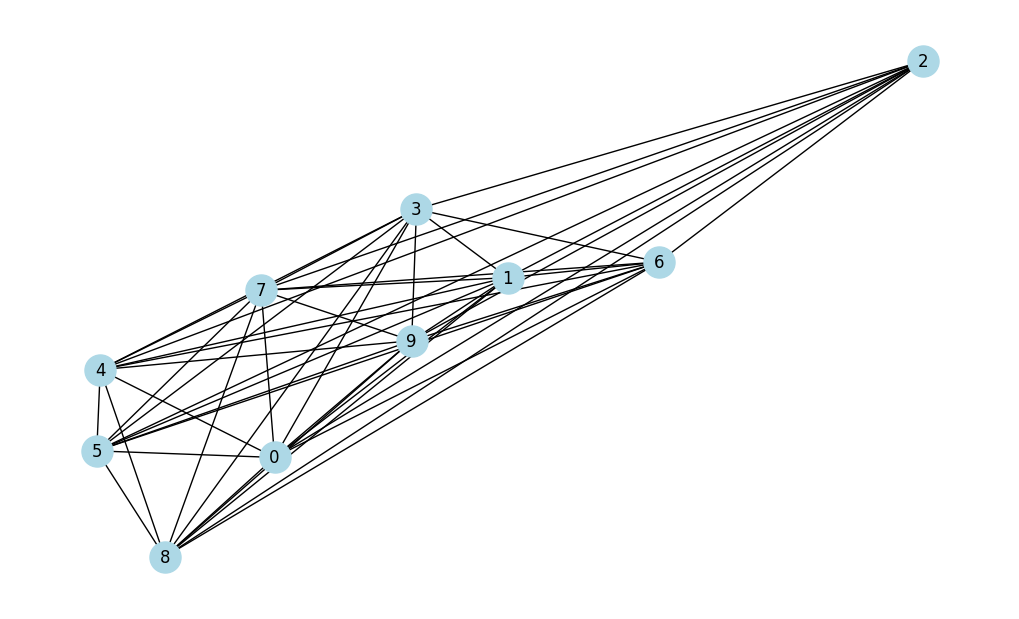

In [3]:
G = gnp_random_connected_graph(10, 1, False, True)

# For Task 1

## Kruskal's algorithm

In [4]:
from networkx.algorithms import tree

In [5]:
mstk = tree.minimum_spanning_tree(G, algorithm="kruskal")

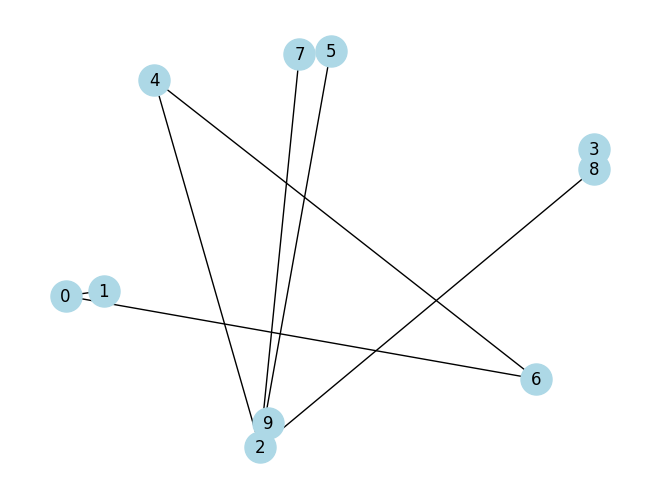

In [6]:
nx.draw(mstk, node_color='lightblue', 
        with_labels=True, 
        node_size=500)

In [7]:
class kruskal_alghoritm:
    def __init__(self, graph) -> None:
        self.nodes = [[i] for i in graph.nodes]
        self.edges = self.kruskal(list(graph.edges(data = True)), self.nodes)
    @staticmethod
    def find(u, nodes):
        for mn in nodes:
            if u in mn:
                return mn
    def kruskal(self, edges, nodes):
        edges = sorted(edges, key= lambda x : x[2]['weight'])
        edges_tree = []
        for edge in edges:
            if len(nodes) == 1:
                return edges_tree
            vertex1 = kruskal_alghoritm.find(edge[0], nodes)
            vertex2 = kruskal_alghoritm.find(edge[1], nodes)
            if vertex1 != vertex2:
                edges_tree.append((edge[0], edge[1]))
                nodes[nodes.index(vertex2)] += (vertex1)
                nodes.pop(nodes.index(vertex1))
        return edges_tree

karkas_kruskal = kruskal_alghoritm(G)
print(len(karkas_kruskal.edges))
print(karkas_kruskal.edges)


9
[(2, 8), (2, 7), (4, 6), (2, 4), (2, 5), (0, 6), (0, 1), (3, 8), (2, 9)]


In [9]:
print(mstk.edges)
karkas_kruskal = kruskal_alghoritm(G)
print(set(mstk.edges) == set(karkas_kruskal.edges))
print(karkas_kruskal.edges)

#Returns True

[(0, 6), (0, 1), (2, 8), (2, 7), (2, 4), (2, 5), (2, 9), (3, 8), (4, 6)]
True
[(2, 8), (2, 7), (4, 6), (2, 4), (2, 5), (0, 6), (0, 1), (3, 8), (2, 9)]


## Prim's algorithm

In [10]:
mstp = tree.minimum_spanning_tree(G, algorithm="prim")

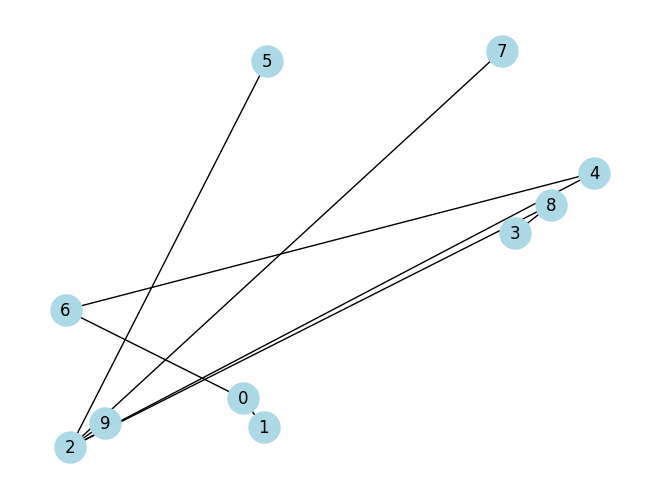

In [11]:
nx.draw(mstp, node_color='lightblue', 
        with_labels=True, 
        node_size=500)

In [12]:
mstp.edges(), len(mstp.edges())

(EdgeView([(0, 6), (0, 1), (2, 4), (2, 8), (2, 7), (2, 5), (2, 9), (3, 8), (4, 6)]),
 9)

In [15]:
class PrimAlgo:
    def __init__(self, graph):
        self.edges = list(graph.edges(data=True))
    def prim(self, graph, start=0):
        visited_nodes = set()
        visited_nodes.add(start)
        res = []
        while len(visited_nodes) < len(graph.nodes):
                possible_edges = []
                for edge in self.edges:
                    if (edge[0] in visited_nodes and edge[1] not in visited_nodes) or\
                        (edge[0] not in visited_nodes and edge[1] in visited_nodes):
                        possible_edges.append(edge)
                possible_edges = sorted(possible_edges, key = lambda x: x[2]['weight'])
                res.append(possible_edges[0])
                visited_nodes.add(possible_edges[0][0])
                visited_nodes.add(possible_edges[0][1])
        return res
a = PrimAlgo(G)

a.prim(G)
b = [i[:2] for i in a.prim(G)]
print(b)
print(mstp.edges())
print(set(b) == set(mstp.edges()))

[(0, 6), (4, 6), (2, 4), (2, 8), (2, 7), (2, 5), (0, 1), (3, 8), (2, 9)]
[(0, 6), (0, 1), (2, 4), (2, 8), (2, 7), (2, 5), (2, 9), (3, 8), (4, 6)]
True


# For Task 2

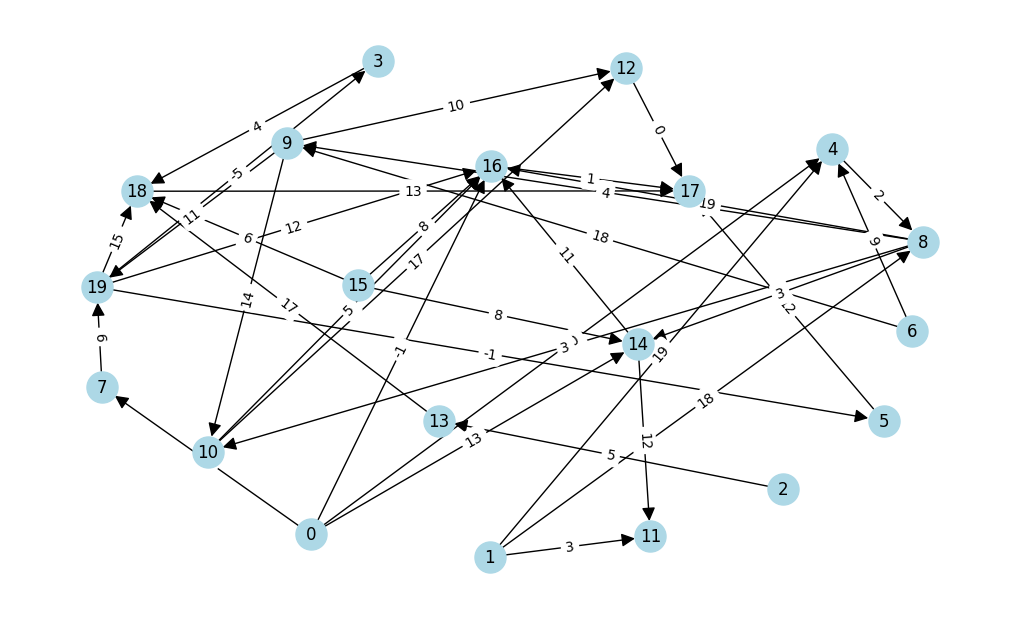

In [16]:
G = gnp_random_connected_graph(20, 0.1, True, True)

## Bellman-Ford algorithm

In [17]:
from networkx.algorithms import bellman_ford_predecessor_and_distance

In [18]:
# pred is a dictionary of predecessors, dist is a dictionary of distances
try:
    pred, dist = bellman_ford_predecessor_and_distance(G, 0)
    for k, v in dist.items():
        print(f"Distance to {k}:", v)
except:
    print("Negative cycle detected")

Distance to 0: 0
Distance to 16: -1
Distance to 4: 10
Distance to 7: 18
Distance to 14: 13
Distance to 17: 0
Distance to 8: 12
Distance to 19: 24
Distance to 11: 25
Distance to 9: 16
Distance to 10: 15
Distance to 3: 19
Distance to 5: 23
Distance to 18: 23
Distance to 12: 26


In [20]:
class Berman_Ford_alghrotim:
    def __init__(self, orientated_graph, starting_node) -> None:
        self.starting_node = starting_node
        self.edges = list(orientated_graph.edges(data = True))
        self.nodes = orientated_graph.nodes
    def shortest_path(self):
        distance = {}
        for v in self.nodes:
            distance[v] = float('inf')
        distance[self.starting_node] = 0
        for _ in range(1, len(self.nodes) - 1):
            for edge in self.edges:
                if distance[edge[0]] + edge[2]['weight'] < distance[edge[1]]:
                    distance[edge[1]] = distance[edge[0]] + edge[2]['weight']
        for edge in self.edges:
            if distance[edge[0]] + edge[2]['weight'] < distance[edge[1]]:
                return "Negative cycle detected"
        return {i : j for i, j in distance.items() if j != float('inf')}
berman_ford_result = Berman_Ford_alghrotim(G, 0)
try:
    dist = berman_ford_result.shortest_path()
    for u, w in dist.items():
        print(f"Distance to {u}:", w)
except ValueError:
    print("Negative cycle detected")
        



Distance to 0: 0
Distance to 3: 19
Distance to 4: 10
Distance to 5: 23
Distance to 7: 18
Distance to 8: 12
Distance to 9: 16
Distance to 10: 15
Distance to 11: 25
Distance to 12: 26
Distance to 14: 13
Distance to 16: -1
Distance to 17: 0
Distance to 18: 23
Distance to 19: 24


In [21]:
pred, dist = bellman_ford_predecessor_and_distance(G, 0)
berman_ford_result = Berman_Ford_alghrotim(G, 0)
dist1  = berman_ford_result.shortest_path()
print(dist1 == dist)
#Returns True if set of edges is equal

True


## Floyd-Warshall algorithm

In [22]:
from networkx.algorithms import floyd_warshall_predecessor_and_distance

In [23]:
# pred is a dictionary of predecessors, dist is a dictionary of distances dictionaries
try:
    pred, dist = floyd_warshall_predecessor_and_distance(G) 
    for k, v in dist.items():
        print(f"Distances with {k} source:", dict(v))
except:
    print("Negative cycle detected")

Distances with 0 source: {0: 0, 16: -1, 4: 10, 7: 18, 14: 13, 1: inf, 2: inf, 3: 19, 5: 23, 6: inf, 8: 12, 9: 16, 10: 15, 11: 25, 12: 26, 13: inf, 15: inf, 17: 0, 18: 23, 19: 24}
Distances with 1 source: {1: 0, 11: 3, 4: 19, 8: 18, 0: inf, 2: inf, 3: 28, 5: 32, 6: inf, 7: inf, 9: 22, 10: 21, 12: 32, 13: inf, 14: 21, 15: inf, 16: 26, 17: 27, 18: 32, 19: 33}
Distances with 2 source: {2: 0, 13: 5, 0: inf, 1: inf, 3: inf, 4: inf, 5: inf, 6: inf, 7: inf, 8: inf, 9: inf, 10: inf, 11: inf, 12: inf, 14: inf, 15: inf, 16: inf, 17: 35, 18: 22, 19: inf}
Distances with 3 source: {3: 0, 18: 4, 0: inf, 1: inf, 2: inf, 4: inf, 5: inf, 6: inf, 7: inf, 8: inf, 9: inf, 10: inf, 11: inf, 12: inf, 13: inf, 14: inf, 15: inf, 16: inf, 17: 17, 19: inf}
Distances with 4 source: {4: 0, 8: 2, 0: inf, 1: inf, 2: inf, 3: 12, 5: 16, 6: inf, 7: inf, 9: 6, 10: 5, 11: 17, 12: 16, 13: inf, 14: 5, 15: inf, 16: 10, 17: 11, 18: 16, 19: 17}
Distances with 5 source: {5: 0, 17: 12, 0: inf, 1: inf, 2: inf, 3: inf, 4: inf, 6:

In [29]:
class floyd_warshall:
    def __init__(self, graph):
        self.graph = graph
        self.matrix = self.graph_to_matr()
    def graph_to_matr(self):
        edges = list(self.graph.edges(data = True))
        n = len(self.graph.nodes())
        matrix = [[float('inf') for i in range(n)] for j in range(n)]
        for edge in edges:
            matrix[edge[0]][edge[1]] = edge[2]['weight']
        for i in range(n):
            matrix[i][i] = 0
        return matrix
    def floyd_warshall(self):
        length = len(self.matrix)
        res = self.matrix.copy()
        for k in range(length):
            for i in range(length):
                for j in range(length):
                    res[i][j] = min(res[i][j], res[i][k] + res[k][j])
        dict_res = {}
        for row_i, row in enumerate(res):
            dict_res[row_i] = {el_i:el for el_i, el in enumerate(row)}


        return dict_res
a = floyd_warshall(G)
print(a.floyd_warshall())
pred, dist = floyd_warshall_predecessor_and_distance(G) 
print(set(a.floyd_warshall()) == set(dist)) #Returns True

{0: {0: 0, 1: inf, 2: inf, 3: 19, 4: 10, 5: 23, 6: inf, 7: 18, 8: 12, 9: 16, 10: 15, 11: 25, 12: 26, 13: inf, 14: 13, 15: inf, 16: -1, 17: 0, 18: 23, 19: 24}, 1: {0: inf, 1: 0, 2: inf, 3: 28, 4: 19, 5: 32, 6: inf, 7: inf, 8: 18, 9: 22, 10: 21, 11: 3, 12: 32, 13: inf, 14: 21, 15: inf, 16: 26, 17: 27, 18: 32, 19: 33}, 2: {0: inf, 1: inf, 2: 0, 3: inf, 4: inf, 5: inf, 6: inf, 7: inf, 8: inf, 9: inf, 10: inf, 11: inf, 12: inf, 13: 5, 14: inf, 15: inf, 16: inf, 17: 35, 18: 22, 19: inf}, 3: {0: inf, 1: inf, 2: inf, 3: 0, 4: inf, 5: inf, 6: inf, 7: inf, 8: inf, 9: inf, 10: inf, 11: inf, 12: inf, 13: inf, 14: inf, 15: inf, 16: inf, 17: 17, 18: 4, 19: inf}, 4: {0: inf, 1: inf, 2: inf, 3: 12, 4: 0, 5: 16, 6: inf, 7: inf, 8: 2, 9: 6, 10: 5, 11: 17, 12: 16, 13: inf, 14: 5, 15: inf, 16: 10, 17: 11, 18: 16, 19: 17}, 5: {0: inf, 1: inf, 2: inf, 3: inf, 4: inf, 5: 0, 6: inf, 7: inf, 8: inf, 9: inf, 10: inf, 11: inf, 12: inf, 13: inf, 14: inf, 15: inf, 16: inf, 17: 12, 18: inf, 19: inf}, 6: {0: inf, 1:

## Some useful explanations

### How to get list of edges for your algorithm

In [63]:
edges = list(G.edges()) # by default G.edges are EdgesView class

In [105]:
edges[:5]

[(0, 17), (0, 7), (0, 8), (0, 13), (0, 28)]

### To get edges with weights

In [106]:
edges = list(G.edges(data=True))

In [107]:
edges[:5]

[(0, 17, {'weight': 4}),
 (0, 7, {'weight': 3}),
 (0, 8, {'weight': 11}),
 (0, 13, {'weight': -1}),
 (0, 28, {'weight': 10})]

In [108]:
nodes = list(G.nodes())
print(nodes)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]


## Example on time measuring

Read more on this: https://realpython.com/python-timer/

Recall that you should measure times for 5, 10, 20, 50, 100, 200, 500 nodes 1000 times (and take mean of time taken for each node amount).

Then you should build the plot for two algorithms (x - data size, y - mean time of execution).

In [30]:
import time
from tqdm import tqdm
import numpy as np
import matplotlib.pyplot as matpl

TIME MEASURING BERMAN_FORD ALGHORITHM


100%|██████████| 100/100 [00:00<00:00, 16669.86it/s]


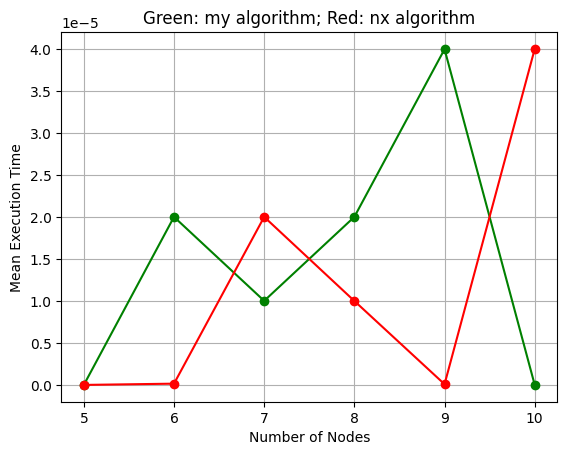

In [44]:
NUM_OF_ITERATIONS = 100
nodes_lst = [5, 6, 7, 8, 9, 10]

def executions_my_alghoritm(nodes):
    execution_times = []
    for i in tqdm(range(NUM_OF_ITERATIONS)):

        G = gnp_random_connected_graph(nodes, 0.01, True)

        start = time.time()
        Berman_Ford_alghrotim(G, 0).shortest_path()
        end = time.time()
        execution_times.append(end - start)


    return np.mean(execution_times)
mean_times = []
for node_amount in nodes_lst:
    mean_times.append(executions_my_alghoritm(node_amount))

def executions_nx_module(nodes):
    execution_times = []
    for i in tqdm(range(NUM_OF_ITERATIONS)):

        G = gnp_random_connected_graph(nodes, 0.01, True)

        start = time.time()
        bellman_ford_predecessor_and_distance(G, 0)
        end = time.time()
        execution_times.append(end - start)


    return np.mean(execution_times)

mean_times2 = []
for node_amount in nodes_lst:
    mean_times2.append(executions_nx_module(node_amount))

plt.plot(nodes_lst, mean_times, marker='o', color='green')
plt.plot(nodes_lst, mean_times2, marker='o', color='red')
plt.title('Green: my algorithm; Red: nx algorithm')
plt.xlabel('Number of Nodes')
plt.ylabel('Mean Execution Time')
plt.grid(True)
plt.show()


TIME MEASURING KRUSKAL'S ALGHORITHM

100%|██████████| 10/10 [00:00<00:00, 25.06it/s]


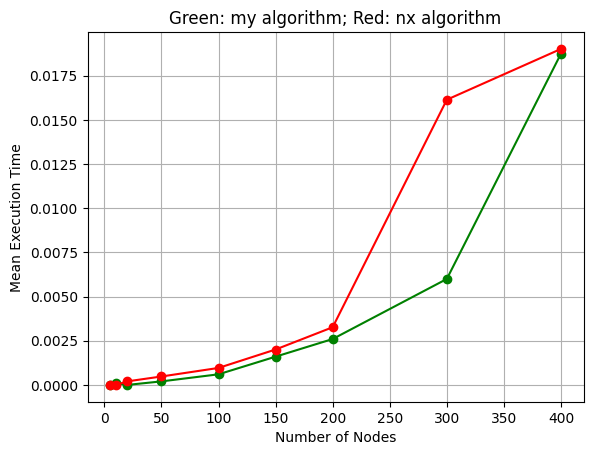

In [42]:
NUM_OF_ITERATIONS = 10
nodes_lst = [5, 10, 20, 50, 100, 150, 200, 300, 400]

def executions_my_alghoritm(nodes):
    execution_times = []
    for i in tqdm(range(NUM_OF_ITERATIONS)):

        G = gnp_random_connected_graph(nodes, 0.1, False)

        start = time.time()
        kruskal_alghoritm(G).edges
        end = time.time()
        execution_times.append(end - start)


    return np.mean(execution_times)
mean_times = []
for node_amount in nodes_lst:
    mean_times.append(executions_my_alghoritm(node_amount))

def executions_nx_module(nodes):
    execution_times = []
    for i in tqdm(range(NUM_OF_ITERATIONS)):

        G = gnp_random_connected_graph(nodes, 0.1, False)

        start = time.time()
        tree.minimum_spanning_tree(G, algorithm="kruskal")
        end = time.time()
        execution_times.append(end - start)


    return np.mean(execution_times)

mean_times2 = []
for node_amount in nodes_lst:
    mean_times2.append(executions_nx_module(node_amount))

plt.plot(nodes_lst, mean_times, marker='o', color='green')
plt.plot(nodes_lst, mean_times2, marker='o', color='red')
plt.title('Green: my algorithm; Red: nx algorithm')
plt.xlabel('Number of Nodes')
plt.ylabel('Mean Execution Time')
plt.grid(True)
plt.show()


TIME MEASURING PRIM'S ALGHORITHM

100%|██████████| 10/10 [00:00<00:00, 30.95it/s]


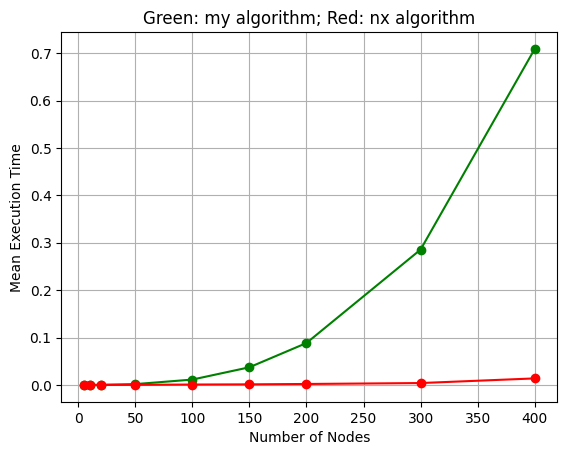

In [41]:
NUM_OF_ITERATIONS = 10
nodes_lst = [5, 10, 20, 50, 100, 150, 200, 300, 400]

def executions_my_alghoritm(nodes):
    execution_times = []
    for i in tqdm(range(NUM_OF_ITERATIONS)):

        G = gnp_random_connected_graph(nodes, 0.1, False)

        start = time.time()
        a = PrimAlgo(G)
        a.prim(G)
        b = [i[:2] for i in a.prim(G)]
        end = time.time()
        execution_times.append(end - start)


    return np.mean(execution_times)
mean_times = []
for node_amount in nodes_lst:
    mean_times.append(executions_my_alghoritm(node_amount))

def executions_nx_module(nodes):
    execution_times = []
    for i in tqdm(range(NUM_OF_ITERATIONS)):

        G = gnp_random_connected_graph(nodes, 0.1, False)

        start = time.time()
        tree.minimum_spanning_tree(G, algorithm="prim")
        end = time.time()
        execution_times.append(end - start)


    return np.mean(execution_times)

mean_times2 = []
for node_amount in nodes_lst:
    mean_times2.append(executions_nx_module(node_amount))

plt.plot(nodes_lst, mean_times, marker='o', color='green')
plt.plot(nodes_lst, mean_times2, marker='o', color='red')
plt.title('Green: my algorithm; Red: nx algorithm')
plt.xlabel('Number of Nodes')
plt.ylabel('Mean Execution Time')
plt.grid(True)
plt.show()


TIME MEASURING  FLOYD-WARSHALL  ALGHORITHM

100%|██████████| 10/10 [00:00<00:00, 14.68it/s]


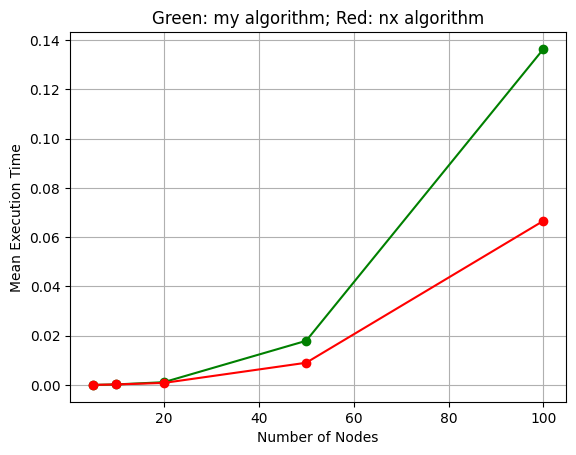

In [40]:
NUM_OF_ITERATIONS = 10
nodes_lst = [5, 10, 20, 50, 100]

def executions_my_alghoritm(nodes):
    execution_times = []
    for i in tqdm(range(NUM_OF_ITERATIONS)):

        G = gnp_random_connected_graph(nodes, 0.01, True)
        tes = floyd_warshall(G)
        start = time.time()
        tes.floyd_warshall()
        end = time.time()
        execution_times.append(end - start)


    return np.mean(execution_times)
mean_times = []
for node_amount in nodes_lst:
    mean_times.append(executions_my_alghoritm(node_amount))

def executions_nx_module(nodes):
    execution_times = []
    for i in tqdm(range(NUM_OF_ITERATIONS)):

        G = gnp_random_connected_graph(nodes, 0.01, True)

        start = time.time()
        floyd_warshall_predecessor_and_distance(G) 
        end = time.time()
        execution_times.append(end - start)


    return np.mean(execution_times)

mean_times2 = []
for node_amount in nodes_lst:
    mean_times2.append(executions_nx_module(node_amount))

plt.plot(nodes_lst, mean_times, marker='o', color='green')
plt.plot(nodes_lst, mean_times2, marker='o', color='red')
plt.title('Green: my algorithm; Red: nx algorithm')
plt.xlabel('Number of Nodes')
plt.ylabel('Mean Execution Time')
plt.grid(True)
plt.show()